# Initial setup and pre-processing

In [2]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
con = sqlite3.connect('../data/database.db')
df = pd.read_sql_query('SELECT * FROM cardDev;', con, index_col='id')
df['issued'] = pd.to_datetime(df['issued'], format='%y%m%d')
df.head()

,dispId,type,issued
id,,,
1005,9285,classic,1993-11-07
104,588,classic,1994-01-19
747,4915,classic,1994-02-05
70,439,classic,1994-02-08
577,3687,classic,1994-02-15


# Analyzing type

In [6]:
print(df['type'].unique())

['classic' 'junior' 'gold']


Text(0.5, 0, 'frequency of each type')

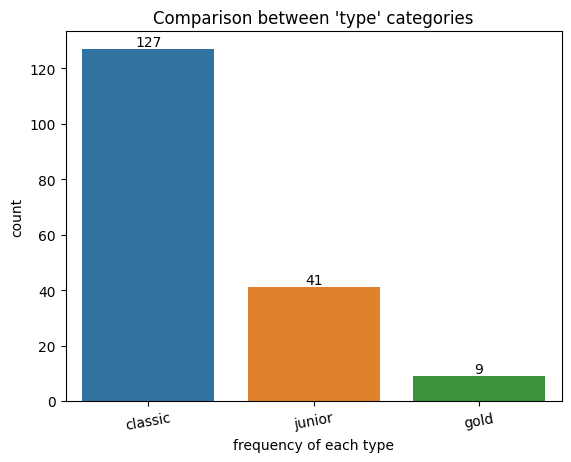

In [7]:
ax = sns.countplot(df, x='type')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=10)
plt.title("Comparison between 'type' categories")
plt.xlabel('frequency of each type')

# Analyzing date

Text(0.5, 0, 'year')

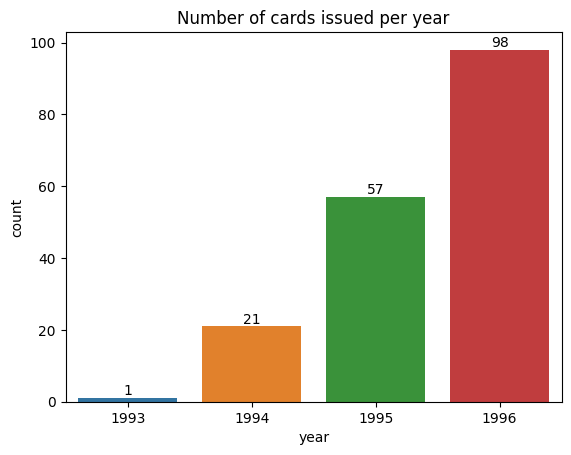

In [8]:
ax = sns.countplot(df, x=df['issued'].dt.strftime('%Y'))
ax.bar_label(ax.containers[0])
plt.title('Number of cards issued per year')
plt.xlabel('year')

Text(0.5, 0, 'year')

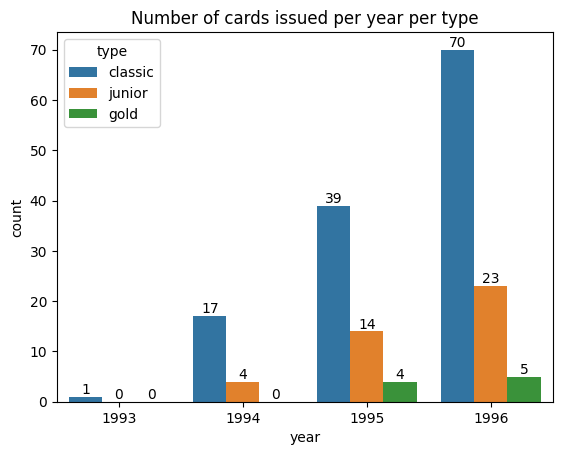

In [19]:
ax = sns.countplot(df, x=df['issued'].dt.strftime('%Y'), hue=df['type'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Number of cards issued per year per type')
plt.xlabel('year')

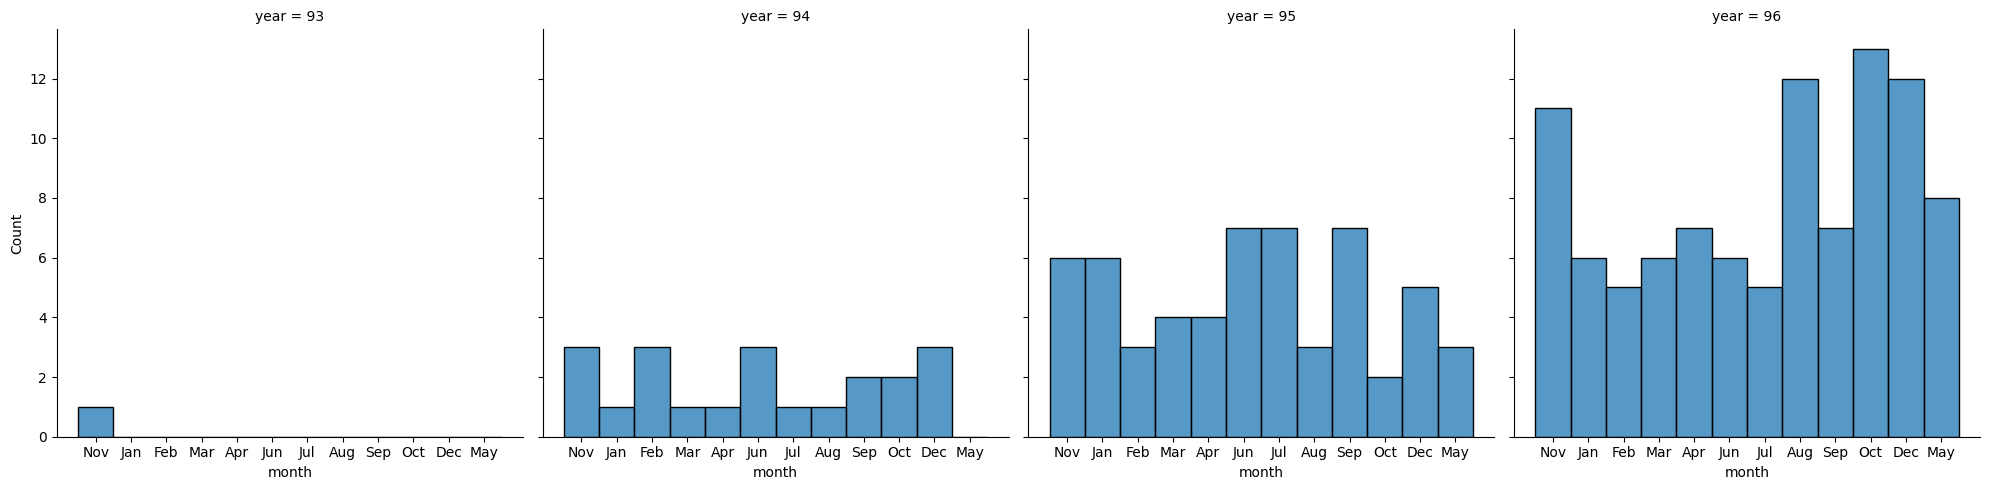

In [25]:
temp = df.copy()
temp['month'] = temp['issued'].dt.strftime('%b')
temp['year'] = temp['issued'].dt.strftime('%y')
sns.displot(temp, x='month', col='year')

mais cartões issued em meses com férias/épocas festivas????